In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [117]:
data=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/instagram_reach.csv')

In [118]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [119]:
for i in range(len(data['Time since posted'])):
    value=data.loc[i,'Time since posted']
    replaced=value.replace('hours','')
    data.loc[i,'Time since posted']=replaced


In [120]:
data['Time since posted']=data['Time since posted'].astype(int)

In [121]:
data['Time since posted'].dtype

dtype('int32')

In [122]:
data.drop(['Unnamed: 0','S.No'],axis=1)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


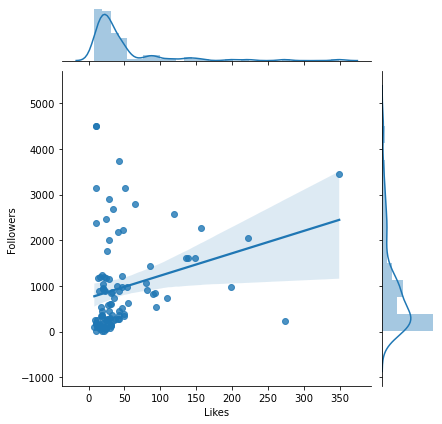

In [123]:
#draw the joint plot as microtask says
sns.jointplot(x=data['Likes'],y=data['Followers'],kind="reg")

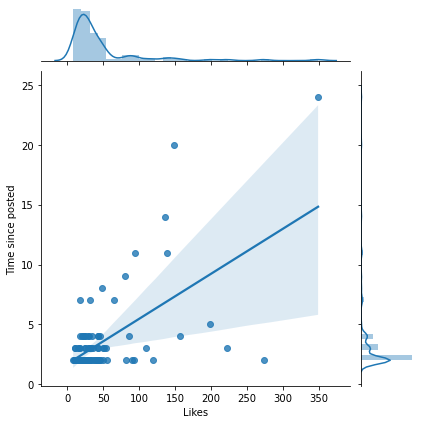

In [124]:
#draw the joint plot as microtask says
sns.jointplot(x=data['Likes'],y=data['Time since posted'],kind="reg")

In [125]:
X=data[['Followers','Time since posted']]
y=data['Likes']

In [126]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [127]:
y_train=y_train.values.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80, 1)
(20,)


In [128]:
reg=LinearRegression()


In [129]:
reg.fit(X_train,y_train)

LinearRegression()

In [130]:
print("Regression.coefficient:",reg.coef_)

Regression.coefficient: [[2.73561082e-03 6.98811506e+00]]


In [131]:
print("Regression intercept_:",reg.intercept_)


Regression intercept_: [18.85889373]


In [132]:
#reshaping of Coef_
new_reg_coef_=(reg.coef_).reshape(-1,1)

In [133]:
#Read coeffi column wise
pd.DataFrame(new_reg_coef_, X.columns, columns = ['Coeff'])

,Coeff
Followers,0.002736
Time since posted,6.988115


In [134]:
#predict value of y
y_predict=reg.predict(X_test)

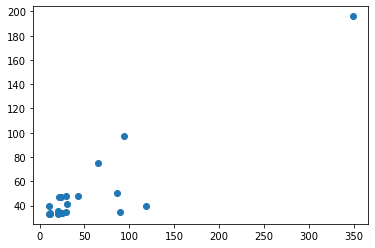

In [135]:
#scatter plot to understand the data
plt.scatter(y_test,y_predict)

In [136]:

MSE=metrics.mean_squared_error(y_test,y_predict)
MAE=metrics.mean_absolute_error(y_test,y_predict)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print("MSE:",MSE,"MAE:",MAE,"RMSE:",RMSE)

MSE: 1928.6389694552345 MAE: 28.175441521834397 RMSE: 43.91627226274146
